In [1]:
import numpy as np
import pandas as pd

In [2]:
from data_files import get_train_validation_test_files

In [3]:
import os
#the following path is on IRON-HIDE
train_test_folder = '/data/km3net/Xy_multi_data_files/train_test_files/cosz_no_stratify/'
fnames_train, fnames_val, fnamaes_test, index_split_files = get_train_validation_test_files(train_test_folder)

In [4]:
from data_loaders import metadata_generator, get_n_iterations, data_generator

Using TensorFlow backend.


In [5]:
predict_steps, tot_test_events = get_n_iterations(fnamaes_test, batch_size=64)

In [6]:
print(predict_steps, tot_test_events)

810 51818


In [7]:
from data_files import get_multi_data_files

In [8]:
multi_files_paths = get_multi_data_files('/data/km3net/Xy_multi_data_files/')

In [9]:
from keras import backend as K
#get only TX because this network uses only the TZ view
def get_TZ(X):
    TZ = np.sum(X, axis=(2, 3))
    if K.image_data_format() == "channels_first":
        TZ = TZ[:, np.newaxis, ...]
    else:
        TZ = TZ[..., np.newaxis]
    return TZ

test_data_generator = data_generator(fnamaes_test, batch_size=64, fdata=get_TZ, ftarget=lambda y: y)
metadata_keylist = ['E', 'posx', 'posy', 'posz', 'dirx', 'diry', 'dirz']
metadata_gen = metadata_generator(index_split_files, multi_files_paths, metadata_keylist)

In [10]:
from network_models import inference_step

In [13]:
import tensorflow as tf

In [15]:
from network_models import TZnet_regression_cosz
#with tf.device('gpu:1'):
model = TZnet_regression_cosz()
model.load_weights('./model_no_git//tz_net_regression_64_100_regression_cosz.hdf5')

model.load_weights("model/regression_cosz_no_strat/tz_net_regression_weights_training_regression_cosz_no_strat.hdf5")

In [16]:
metadata, y_true, y_pred = inference_step(model, test_data_generator, predict_steps, 
                                          metadata_gen, categorical=False)

100%|██████████| 810/810 [02:37<00:00,  5.13it/s]


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
mean_squared_error(y_true, y_pred)

0.035875821117016003

In [19]:
r2_score(y_true, y_pred)

0.88798567787867311

### Plot NuMUCC + NuE CosZ Regression

In [20]:
from matplotlib import pyplot as plt

%matplotlib inline

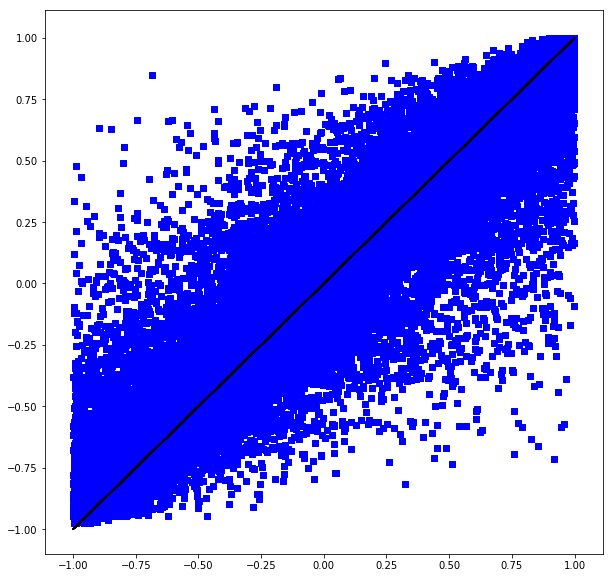

In [21]:
plt.figure(figsize=(10, 10))
plt.plot(y_true, y_true, color='k', linestyle='solid')
# plt.plot(y_true, y_pred, color='k', linestyle='solid')
plt.scatter(y_true, y_pred, marker='s', color='b')
plt.show()

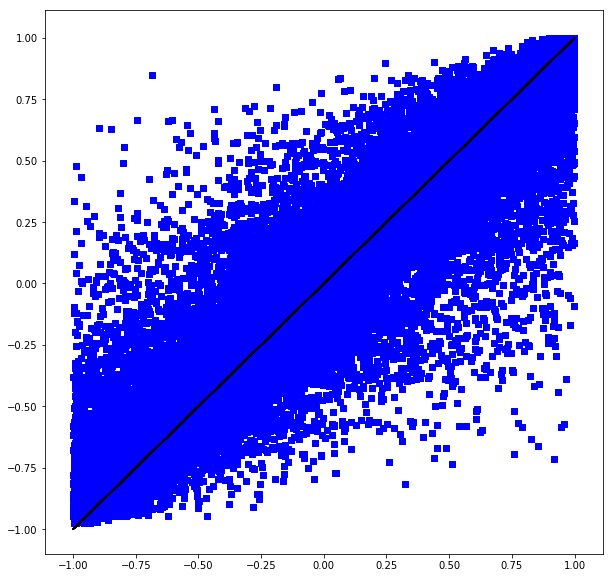

In [22]:
plt.figure(figsize=(10, 10))
plt.plot(y_true, y_true, color='k', linestyle='solid')
# plt.plot(y_true, y_pred, color='k', linestyle='solid')
plt.scatter(y_true, y_pred, marker='s', color='b')
plt.show()

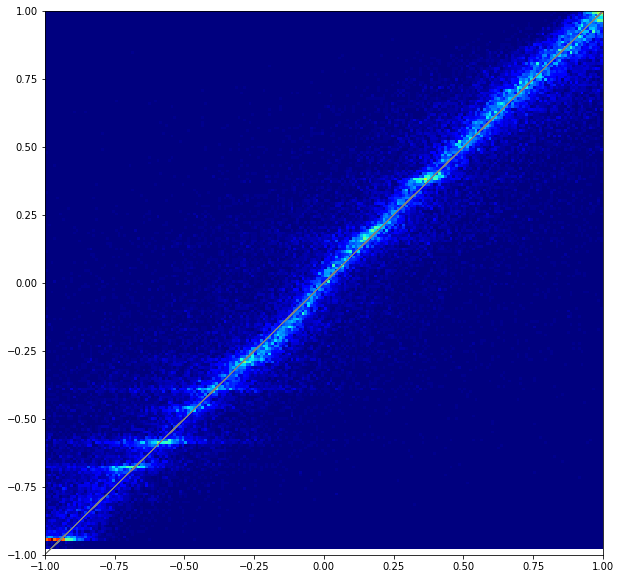

In [23]:
plt.figure(figsize=(10, 10))
plt.plot(y_true, y_true, color='grey', linestyle='-.', lw=0.5)
# plt.plot(y_true, y_pred, color='k', linestyle='solid')
#plt.scatter(y_true, y_pred, marker='o', color="blue", edgecolor='w')
plt.hist2d(y_true, y_pred, bins=[200,200], cmap='jet')
#plt.xlabel('Energy(log10)')
#plt.ylabel('Energy(log10)')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.title('')
plt.show()

(-0.85, -0.55)

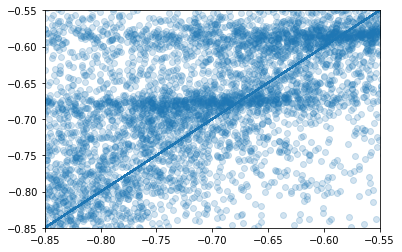

In [95]:
plt.scatter(y_true, y_pred, alpha = 0.2)
plt.plot(y_true,y_true)
plt.xlim([-0.85,-0.55])
plt.ylim([-0.85,-0.55])

In [65]:
plt.hist2d?

In [43]:
from collections import Counter

In [44]:
c = Counter(y_pred)

In [48]:
k = list(c.keys())

In [49]:
c[k[0]]

1

In [72]:
c.most_common(100)

[(1.0, 3),
 (-0.092009313, 3),
 (-0.39177555, 3),
 (0.47321752, 3),
 (0.42936286, 3),
 (-0.22381823, 3),
 (0.50581092, 3),
 (0.55283982, 3),
 (-0.2867676, 3),
 (-0.22712216, 3),
 (0.38140881, 3),
 (0.72210443, 3),
 (0.77192348, 3),
 (0.15219308, 3),
 (0.64783227, 3),
 (-0.38284254, 3),
 (-0.59358561, 3),
 (0.1523288, 3),
 (-0.39469019, 3),
 (0.39390945, 3),
 (0.28584945, 3),
 (-0.27419573, 3),
 (0.55642188, 2),
 (0.27029496, 2),
 (-0.0052007483, 2),
 (-0.59608012, 2),
 (-0.36955309, 2),
 (0.60061079, 2),
 (0.57880032, 2),
 (-0.72467166, 2),
 (-0.73378772, 2),
 (0.4252587, 2),
 (0.72669339, 2),
 (-0.10174036, 2),
 (-0.39276332, 2),
 (0.4085533, 2),
 (-0.46729639, 2),
 (-0.5804562, 2),
 (-0.94378942, 2),
 (0.73749387, 2),
 (0.066312343, 2),
 (0.1290608, 2),
 (0.78183919, 2),
 (0.55313855, 2),
 (0.2488568, 2),
 (0.59741724, 2),
 (-0.27969944, 2),
 (-0.36973917, 2),
 (0.59686798, 2),
 (0.14182423, 2),
 (-0.045658827, 2),
 (-0.60400063, 2),
 (0.86747718, 2),
 (-0.46881843, 2),
 (0.40234807,

In [29]:
np.savetxt("cos_z_true.txt", y_true)

In [30]:
np.savetxt("cos_z_pred.txt", y_pred)

### CosZ numu ONLY

In [24]:
numu_files, nue_files = get_multi_data_files('/data/km3net/Xy_multi_data_files/', merge=False)

In [18]:
y_true_numu = list()
numu_test_indices = list()
for i in range(100):
    length = len(np.load(numu_files[i])['y'])
    md = metadata[(metadata["file_evt_index"] == i) & (metadata['evt_index'] < length)]
    y_true_numu.append(md['dirz'])
    test_indices = np.load(index_split_files[i])['test']
    numu_test_indices.append(np.where(test_indices < length)[0])

In [19]:
y_true_numu = np.hstack(y_true_numu)

In [32]:
y_true_numu = list()
y_true_nue = list()

numu_test_indices = list()
nue_test_indices = list()
sum_len_numu = 0
sum_test_numu = 0


sum_test_nue = 0

for i in range(100):
    length = len(np.load(numu_files[i])['y'])
    sum_len_numu += length
    md_numu = metadata[(metadata["file_evt_index"] == i) & (metadata['evt_index'] < length)]
    md_nue = metadata[(metadata["file_evt_index"] == i) & (metadata['evt_index'] >= length)]
    
    y_true_numu.append(md_numu['dirz'])
    y_true_nue.append(md_nue['dirz'])

    test_indices = np.load(index_split_files[i])['test']
    sum_test_numu += np.sum(test_indices < length)
    sum_test_nue += np.sum(test_indices >= length)
    
    numu_test_indices.append(np.where(test_indices < length)[0])
    nue_test_indices.append(np.where(test_indices>= length)[0])

In [33]:
y_true_numu = np.hstack(y_true_numu)
y_true_nue = np.hstack(y_true_nue)

In [34]:
y_true_numu.shape

(30469,)

In [35]:
y_true_nue.shape

(21349,)

In [36]:
from tqdm import tqdm

In [22]:
y_pred_numu = list()
numu_percent = list()
for i in tqdm(range(100)):
    pred_steps, _ = get_n_iterations(fnamaes_test[i:i+1], batch_size=64)
    f_data_gen = data_generator(fnamaes_test[i:i+1], batch_size=64, fdata=get_TZ, ftarget=lambda y: y)
    y_file_pred = list()
    for p in range(pred_steps):    
        X_batch, _ = next(f_data_gen)
        Y_batch_pred = model.predict_on_batch(X_batch)
        y_batch_pred = Y_batch_pred.ravel()
        y_file_pred.append(y_batch_pred)
    
    y_file_pred = np.hstack(y_file_pred)
    numu_percent.append((float(numu_test_indices[i].shape[0]) / y_file_pred.shape[0])*100)
    y_file_pred = y_file_pred[numu_test_indices[i]]
    y_pred_numu.append(y_file_pred)
y_pred_numu = np.hstack(np.asarray(y_pred_numu))

100%|██████████| 100/100 [02:34<00:00,  1.54s/it]


In [40]:
y_pred_numu = list()
y_pred_nue = list()
numu_percent = list()
nue_percent = list()
for i in tqdm(range(100)):
    pred_steps, _ = get_n_iterations(fnamaes_test[i:i+1], batch_size=64)
    f_data_gen = data_generator(fnamaes_test[i:i+1], batch_size=64, fdata=get_TZ, ftarget=lambda y: y)
    y_file_pred = list()
    for p in range(pred_steps):    
        X_batch, _ = next(f_data_gen)
        Y_batch_pred = model.predict_on_batch(X_batch)
        y_batch_pred = Y_batch_pred.ravel()
        y_file_pred.append(y_batch_pred)
    
    y_file_pred = np.hstack(y_file_pred)
    numu_percent.append((float(numu_test_indices[i].shape[0]) / y_file_pred.shape[0])*100)
    y_file_pred_numu = y_file_pred[numu_test_indices[i]]
    y_file_pred_nue = y_file_pred[nue_test_indices[i]]
    y_pred_numu.append(y_file_pred_numu)
    y_pred_nue.append(y_file_pred_nue)
    
y_pred_numu = np.hstack(np.asarray(y_pred_numu))
y_pred_nue = np.hstack(np.asarray(y_pred_nue))

100%|██████████| 100/100 [02:43<00:00,  1.63s/it]


In [23]:
y_pred_numu.shape

(30469,)

In [41]:
y_pred_nue.shape

(21349,)

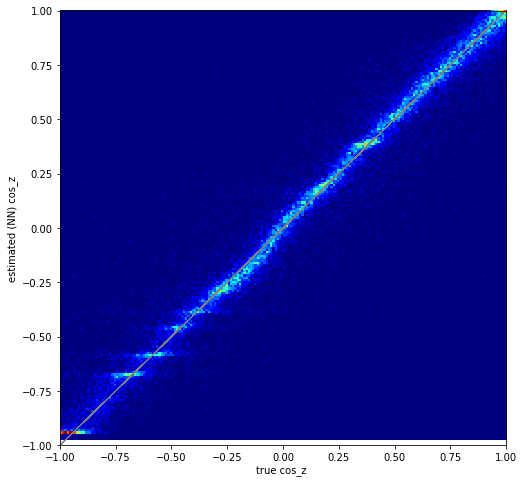

In [53]:
plt.figure(figsize=(8, 8))
plt.plot(y_true_numu, y_true_numu, color='grey', linestyle='-.', lw=0.5)
# plt.plot(y_true, y_pred, color='k', linestyle='solid')
#plt.scatter(y_true, y_pred, marker='o', color="blue", edgecolor='w')
plt.hist2d(y_true_numu, y_pred_numu, bins=200, cmap='jet')
plt.xlabel('true cos_z ')
plt.ylabel('estimated (NN) cos_z')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.title('')
plt.show()

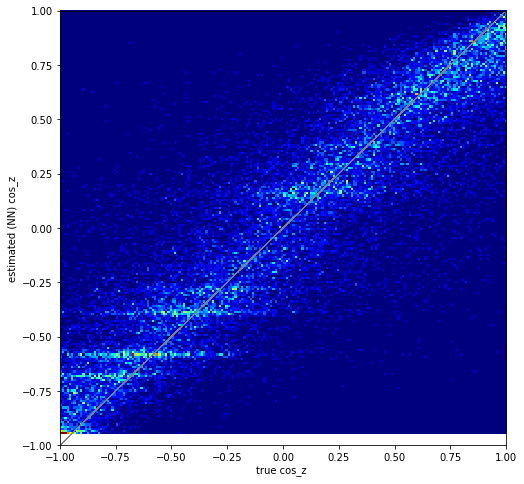

In [54]:
plt.figure(figsize=(8, 8))
plt.plot(y_true_nue, y_true_nue, color='grey', linestyle='-.', lw=0.5)
# plt.plot(y_true, y_pred, color='k', linestyle='solid')
#plt.scatter(y_true, y_pred, marker='o', color="blue", edgecolor='w')
plt.hist2d(y_true_nue, y_pred_nue, bins=200, cmap='jet')
plt.xlabel('true cos_z ')
plt.ylabel('estimated (NN) cos_z')
plt.xlim([-1,1])
plt.ylim([-1.0,1])
plt.title('')
plt.show()

In [56]:
y = np.true_divide(y_pred_numu,y_true_numu)

In [24]:
mean_squared_error(y_true_numu, y_pred_numu)

0.012890577183312548

In [25]:
r2_score(y_true_numu, y_pred_numu)

0.95767580195310631

In [26]:
np.savetxt('cosz_numu_pred.txt', y_pred_numu)

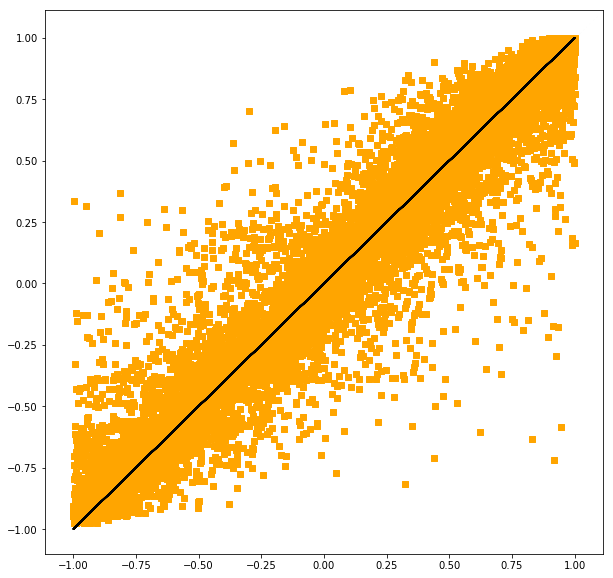

In [47]:
plt.figure(figsize=(10, 10))
plt.plot(y_true_numu, y_true_numu, color='k', linestyle='solid')
# plt.plot(y_true, y_pred, color='k', linestyle='solid')
plt.scatter(y_true_numu, y_pred_numu, marker='s', color='orange')
plt.show()

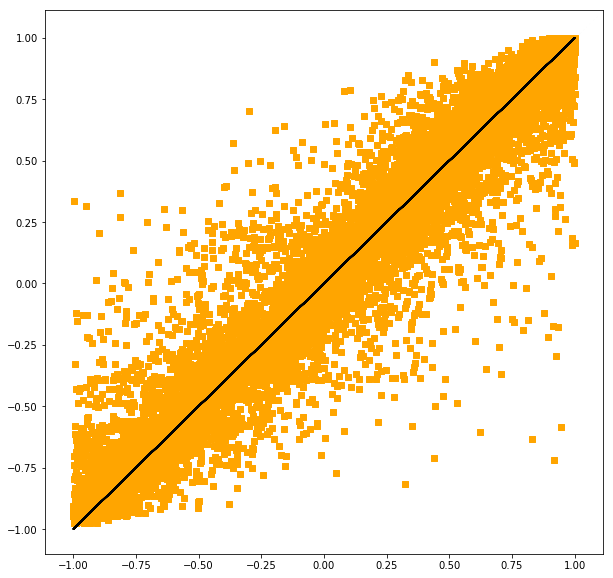

In [48]:
plt.figure(figsize=(10, 10))
plt.plot(y_true_numu, y_true_numu, color='k', linestyle='solid')
# plt.plot(y_true, y_pred, color='k', linestyle='solid')
plt.scatter(y_true_numu, y_pred_numu, marker='s', color='orange')
plt.show()

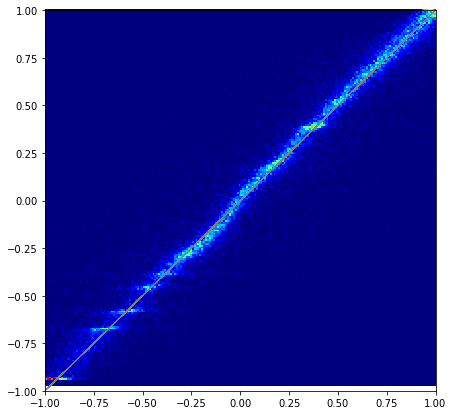

In [49]:
plt.figure(figsize=(7, 7))
plt.plot(y_true_numu, y_true_numu, color='grey', linestyle='-.', lw=0.5)
# plt.plot(y_true, y_pred, color='k', linestyle='solid')
#plt.scatter(y_true, y_pred, marker='o', color="blue", edgecolor='w')
plt.hist2d(y_true_numu, y_pred_numu, bins=200, cmap='jet')
#plt.xlabel('Energy(log10)')
#plt.ylabel('Energy(log10)')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.title('')
plt.show()

### plot history

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from network_models import TZnet_regression_cosz

model = TZnet_regression_cosz()
#model.load_weights('./model/tz_net_regression_64_100_regression_cosz_no_strat.hdf5')

In [2]:
history = np.load("model/regression_cosz_no_strat/tz_net_regression_history_regression_cosz_no_strat.pkl")

In [5]:
history = np.load("model/regression_cosx_no_strat/tx_net_regression_dirx_v4_history_regression_cosx_no_strat.pkl")

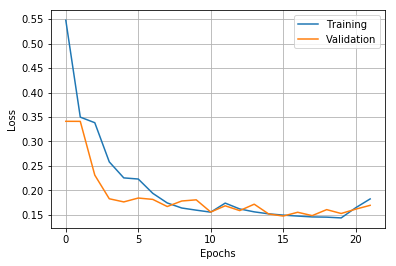

In [6]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history['loss'])
if 'val_loss' in history:
    plt.plot(history['val_loss'])
plt.grid()
plt.legend(['Training', 'Validation'])
plt.show()

In [2]:
history = np.load("model/regression_cosz_rerun/tz_net_regression_historyregression_cosz_rerun.pkl")

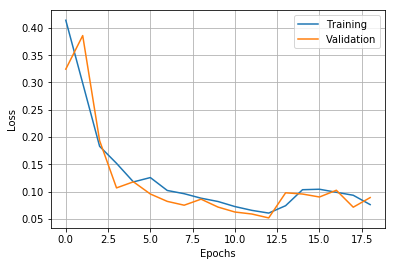

In [5]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history['loss'])
if 'val_loss' in history:
    plt.plot(history['val_loss'])
plt.grid()
plt.legend(['Training', 'Validation'])
plt.show()

In [6]:
print(history["val_loss"])

[0.32451339165858573, 0.38605388698812326, 0.19332085845043415, 0.10667319591841402, 0.11783743145304743, 0.095493440189899886, 0.081950946124385818, 0.074929570783653046, 0.085978679136435768, 0.07151804809611538, 0.062428583118720626, 0.058780885239496115, 0.051605939354998007, 0.097708377039624345, 0.095409276004749369, 0.089978685290824201, 0.10232711946513322, 0.071281565782548642, 0.088896073128661671]


loss: 0.0575 - val_loss: 0.0483
Epoch 2/100
2588/2588 [==============================] - 856s - loss: 0.0548 - val_loss: 0.0477
Epoch 3/100
2588/2588 [==============================] - 878s - loss: 0.0532 - val_loss: 0.0511
Epoch 4/100
2588/2588 [==============================] - 895s - loss: 0.0515 - val_loss: 0.0483
Epoch 5/100
2588/2588 [==============================] - 899s - loss: 0.0505 - val_loss: 0.0459
Epoch 6/100
2588/2588 [==============================] - 903s - loss: 0.0498 - val_loss: 0.0472
Epoch 7/100
2588/2588 [==============================] - 906s - loss: 0.0486 - val_loss: 0.0446

In [7]:
val_l = [0.0477, 0.0511, 0.0483, 0.0459, 0.0472, 0.0446, 0.0427, 0.0419, 0.0397, 0.0358, 0.0321]
l = [0.0548, 0.0532, 0.0515, 0.0505, 0.0498, 0.0486, 0.0472, 0.0403, 0.0375, 0.0333, 0.0318] 

In [8]:
val_loss = np.copy(history["val_loss"])

In [14]:
loss = np.copy(history["loss"])

In [12]:
val_loss_ext = np.hstack((val_loss, np.asarray(val_l)))

In [15]:
loss_ext = np.hstack((loss, np.asarray(l)))

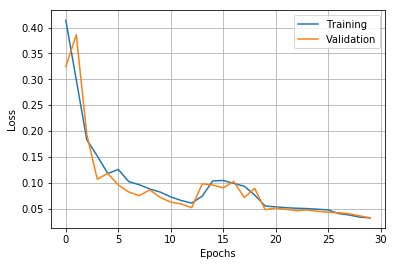

In [17]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss_ext)
if 'val_loss' in history:
    plt.plot(val_loss_ext)
plt.grid()
plt.legend(['Training', 'Validation'])
plt.show()